In [111]:
# imports and loading
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

GLBRC_df = pd.read_excel('../Zymomonas_mobilis/GLBRC_supplied_Zymomonas_Transcriptomics_SRA_Data.xlsx')
GLBRC_df = GLBRC_df.set_index('Experiment Accession')
GLBRC_df['Library Strategy'] = GLBRC_df['Library Strategy'].fillna('Unknown')
GLBRC_df['Library Strategy'] = GLBRC_df['Library Strategy'].astype(str)
iM_use_df = pd.read_csv('../Zymomonas_mobilis/metadata_file_for_iMs.csv', index_col = 0, encoding='latin1')

In [112]:
# missing from iMs_data
not_in_iMs = list(set(GLBRC_df.index) - set(iM_use_df.index))
not_in_iMs.sort()
GLBRC_df.loc[not_in_iMs]['Library Strategy'].value_counts()

OTHER        87
ncRNA-Seq     2
Name: Library Strategy, dtype: int64

In [113]:
# found in iMs_data
not_in_iMs = list(set(GLBRC_df.index).intersection(set(iM_use_df.index)))
not_in_iMs.sort()
GLBRC_df.loc[not_in_iMs]['Library Strategy'].value_counts()

RNA-Seq    391
Name: Library Strategy, dtype: int64

In [114]:
# unpublished included
not_published = GLBRC_df[GLBRC_df['GLBRC_Data'] == 'Yes - Zhang unpublished'].index
used_in_iMs = iM_use_df[iM_use_df['skip'] != True].index
not_published_in_iMs = set(not_published).intersection(set(used_in_iMs))
GLBRC_df.loc[not_published_in_iMs].index

Index(['SRX5329178', 'SRX5329182', 'SRX5329191', 'SRX5329194', 'SRX5329180',
       'SRX5329183', 'SRX5329170', 'SRX5329184', 'SRX5329173', 'SRX5329176',
       'SRX5329179', 'SRX5329193', 'SRX5329190', 'SRX5329185', 'SRX5329177',
       'SRX5329172', 'SRX5329186', 'SRX5329171', 'SRX5329187', 'SRX5329188',
       'SRX5329192', 'SRX5329189', 'SRX5329169', 'SRX5329174', 'SRX5329181',
       'SRX5329175'],
      dtype='object', name='Experiment Accession')

In [115]:
iM_use_df.loc[not_published_in_iMs].to_csv('./not_published_included_in_iMs.csv')

# make pie plots

In [116]:
iM_used_df = iM_use_df[iM_use_df['skip'] != True]

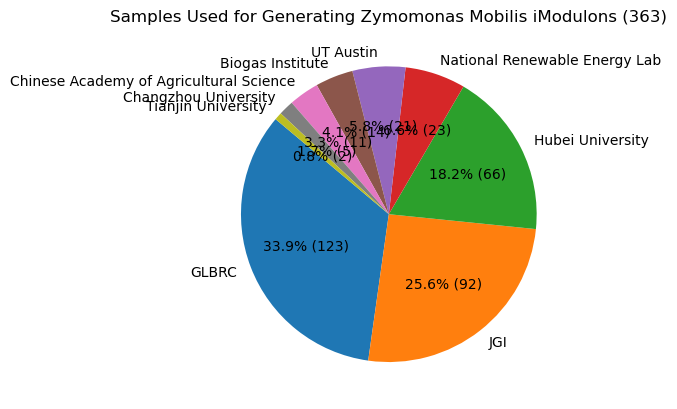

In [117]:
lab_counts = dict(iM_used_df['lab'].value_counts())
plt.pie(
    lab_counts.values(), 
    labels=lab_counts.keys(), 
    autopct=lambda pct: f'{pct:.1f}% ({int(pct/100.*sum(lab_counts.values()))})',
    startangle=140
)
plt.title('Samples Used for Generating Zymomonas Mobilis iModulons ('+str(int(sum(lab_counts.values())))+')')
plt.savefig('./lab_source.pdf', transparent = True)
plt.show()